In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, ticker
%matplotlib inline

In [2]:
def p(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-0.5*(x - 0.5)**2)

In [3]:
def g(a, c, x):
    return a + c*x
def h(a, c, x):
    return p(x)/(p(x) + p(g(a, c, x))*abs(c))
def L(c, x):
    return -1*np.log(h(c, x))*p(x)-np.log(1-h(c, g(c, x)))*p(g(c, x))*abs(c) + (g(c, g(c, x)) - x)**2*p(g(c, x))*abs(c)

In [4]:
xx = np.random.normal(0.5,1.,10000)
A = 0
C = 0
range = 3
alow = A-range
ahigh = A+range
astep = 200
clow = C - range
chigh = C + range
cstep = 200

mylosses=[]
for c in np.linspace(clow,chigh,cstep):
    losses=[]
    for a in np.linspace(alow, ahigh, astep):
        yy = g(a, c, xx)
        losses += [np.mean(-np.log(0.000000001+h(a, c, xx)) - np.log(0.000000001+1.-h(a, c, yy)))]
    mylosses += [losses]

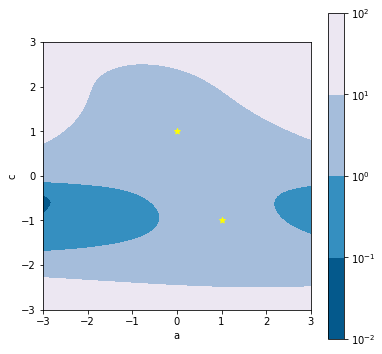

In [5]:
x = np.linspace(alow, ahigh, astep)
y = np.linspace(clow, chigh, cstep)
X,Y = np.meshgrid(x,y)
Z = np.array(mylosses)


fig, ax = plt.subplots(figsize=(6,6))


ax.set_aspect('equal')
ax.set_xlabel('a')
ax.set_ylabel('c')
cf = ax.contourf(X,Y,Z, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
fig.colorbar(cf, ax=ax)
plt.scatter([0, 1], [1, -1], marker='*', c='yellow')


plt.show()